In [15]:
import numpy as np
import pandas as pd

# 1. Data Preparation:

In [25]:
df1 = pd.read_csv('heart_disease.csv')
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


# 2. Exploratory Data Analysis (EDA):

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


In [10]:
df1.shape

(999, 13)

In [11]:
df1.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num         float64
dtype: object

In [12]:
df1.isnull().sum()

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

In [61]:
num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'num']

for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)][col]
    
    print(f"{col}: {len(outliers)} outliers")


age: 1 outliers
trestbps: 22 outliers
chol: 187 outliers
thalch: 1 outliers
oldpeak: 16 outliers


In [9]:
df1.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

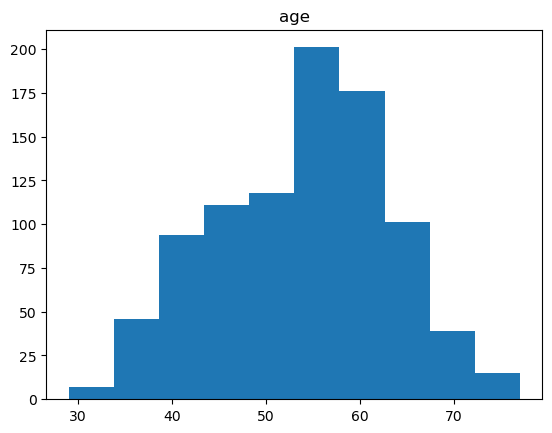

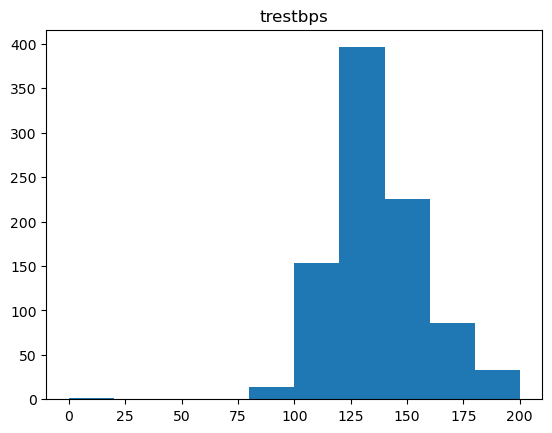

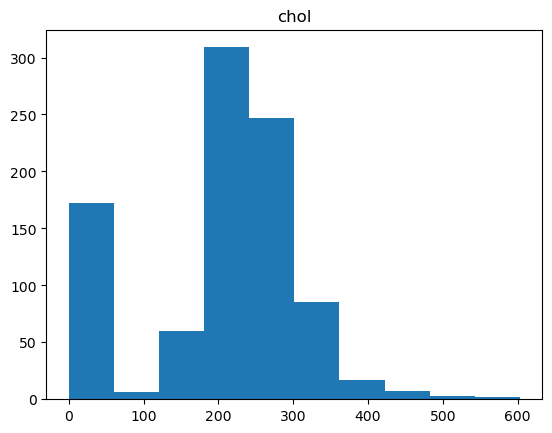

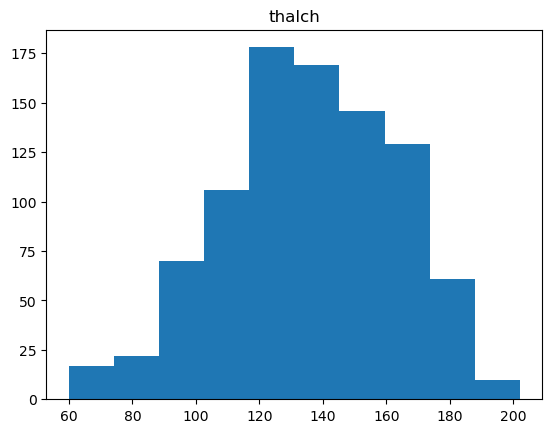

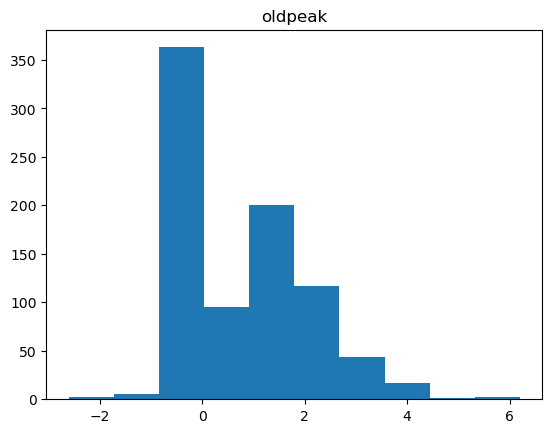

In [62]:
# Histogram

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'num']

for col in num_cols:
    plt.hist(df1[col])
    plt.title(col)
    plt.show()

In [63]:
df1.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         3
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [64]:
df2 = df1.dropna()

In [65]:
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

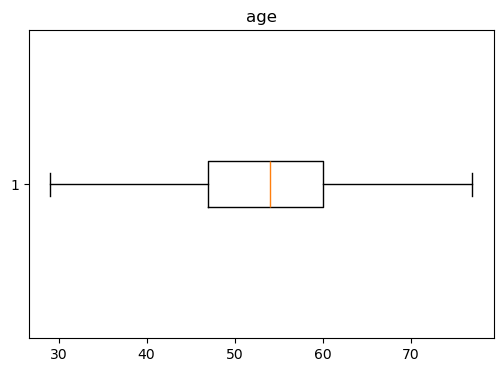

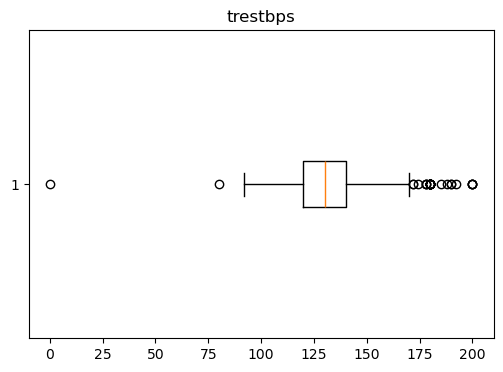

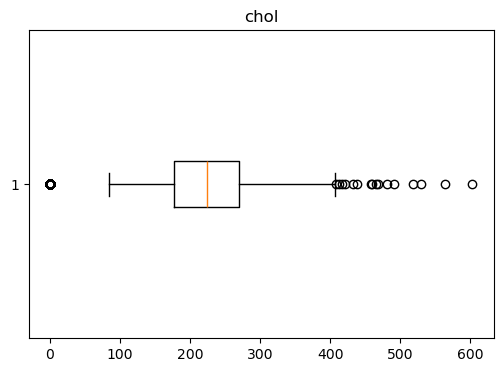

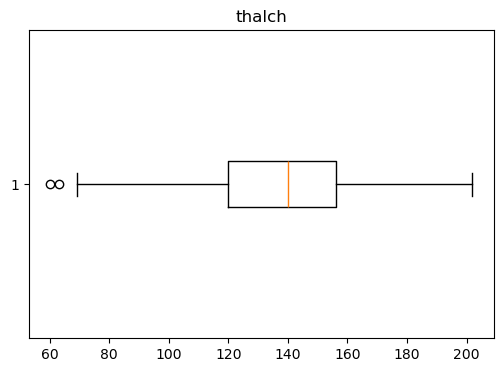

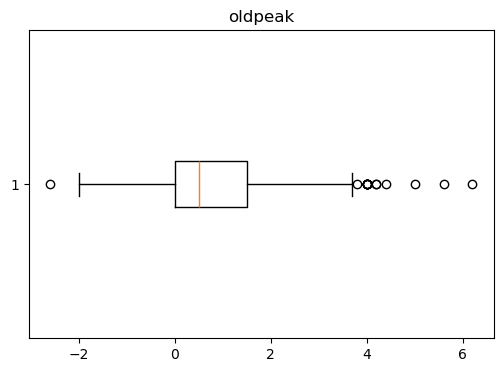

In [66]:
# Box Plot

num_cols = df2.select_dtypes(include=['int64', 'float64']).columns
num_cols = [cols for cols in num_cols if cols != 'num']

import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize = (6, 4))
    plt.boxplot(df2[col], vert = False)
    plt.title(col)
    plt.show()

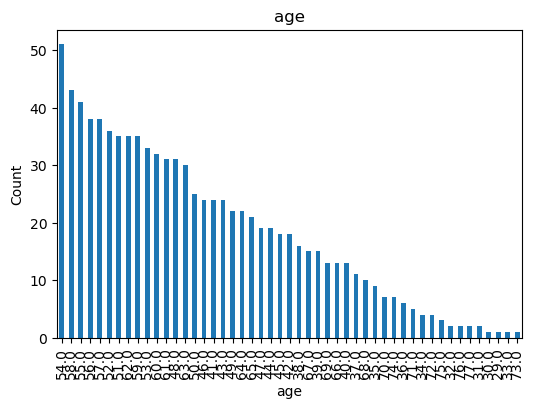

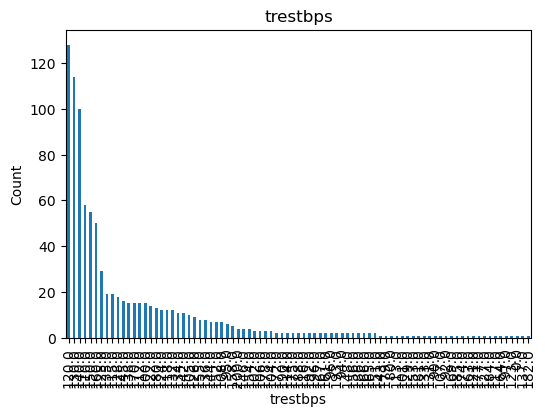

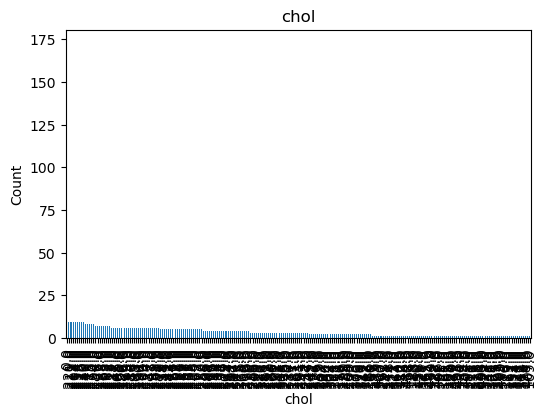

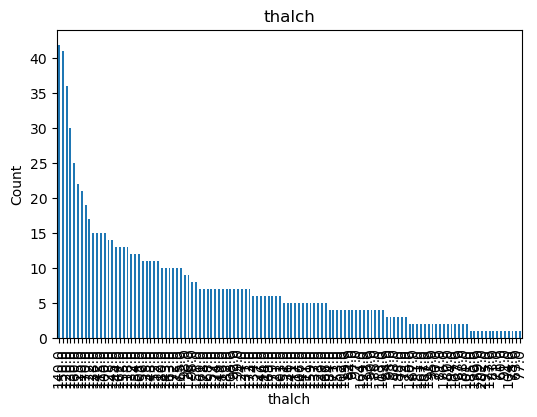

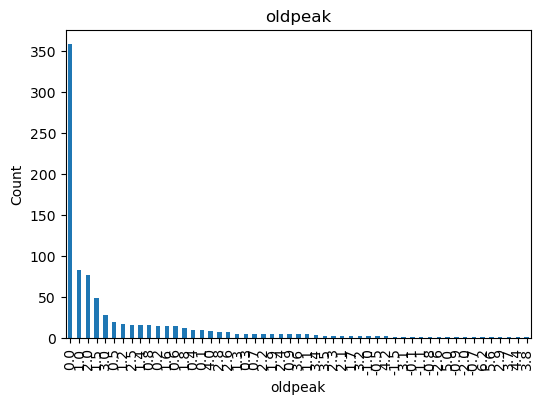

In [70]:
# Bar graph.

car_cols = df1.select_dtypes(include=['object', 'category']).columns
car_cols = [cols for cols in num_cols if cols != 'num']

for col in car_cols:
    plt.figure(figsize = (6,4))
    df1[col].value_counts().plot(kind = 'bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

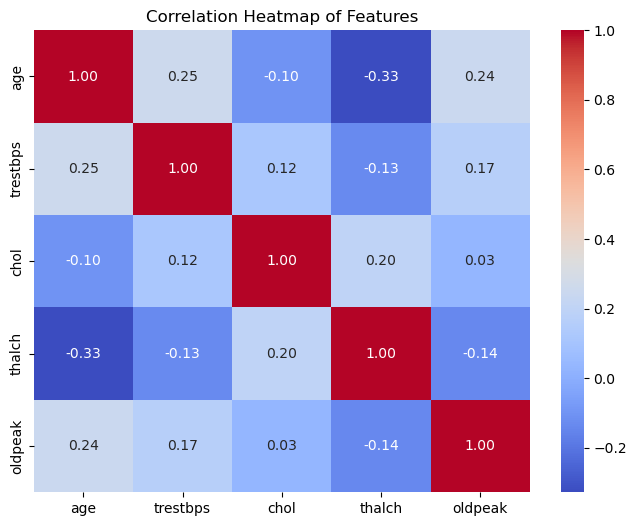

In [68]:
# Correlation Heatmap.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'num']

plt.figure(figsize=(8, 6))
sns.heatmap(df1[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [71]:
# outliers treatment.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'num']

for cols in num_cols:
    Q1 = np.percentile(df1[cols], 25)
    Q3 = np.percentile(df1[cols], 75)
    IQR = Q3 - Q1
    
    UWL = Q3 - (IQR * 1.5)
    LWL = Q1 + (IQR * 1.5)

    df1[cols] = np.where(df1[cols] > UWL, UWL,
              np.where(df1[cols] < LWL, LWL, df1[cols]))

In [72]:
# Checking outilers after outliers treatment.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'num']

outlier_counts = {}

for cols in num_cols:
    Q1 = np.percentile(df1[cols], 25)
    Q3 = np.percentile(df1[cols], 75)
    IQR = Q3 - Q1
    
    UWL = Q3 + (1.5 * IQR)
    LWL = Q1 - (1.5 * IQR)
    
    cnt = ((df1[cols] < LWL) | (df1[cols] > UWL)).sum()
    outlier_counts[cols] = int(cnt)
    
pd.Series(outlier_counts).sort_values(ascending=False)

age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
dtype: int64

# 3. Feature Engineering:

In [77]:
df3 = df1.copy()
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,Male,typical angina,0.567394,0.281297,True,lv hypertrophy,0.524183,FALSE,1.288612,downsloping,fixed defect,0.0
1,-1.397560,Male,atypical angina,0.076967,0.013526,False,normal,-0.147705,FALSE,-0.815249,flat,fixed defect,0.0
2,0.350503,Male,asymptomatic,0.322181,-0.084656,False,normal,0.449529,FALSE,-0.449360,flat,fixed defect,0.0
3,-0.195767,Male,typical angina,-0.756760,-0.138211,False,lv hypertrophy,2.017268,FALSE,-0.815249,flat,fixed defect,0.0
4,0.350503,Male,asymptomatic,-1.149102,-0.004325,False,normal,-0.371668,TRUE,0.556834,flat,fixed defect,0.0


In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [78]:
target = 'num'
num_cols = df3.select_dtypes(include = ['int64', 'float64']).columns.drop(target)

df3[num_cols] = ss.fit_transform(df3[num_cols])
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,Male,typical angina,0.567394,0.281297,True,lv hypertrophy,0.524183,FALSE,1.288612,downsloping,fixed defect,0.0
1,-1.397560,Male,atypical angina,0.076967,0.013526,False,normal,-0.147705,FALSE,-0.815249,flat,fixed defect,0.0
2,0.350503,Male,asymptomatic,0.322181,-0.084656,False,normal,0.449529,FALSE,-0.449360,flat,fixed defect,0.0
3,-0.195767,Male,typical angina,-0.756760,-0.138211,False,lv hypertrophy,2.017268,FALSE,-0.815249,flat,fixed defect,0.0
4,0.350503,Male,asymptomatic,-1.149102,-0.004325,False,normal,-0.371668,TRUE,0.556834,flat,fixed defect,0.0


In [123]:
df4 = pd.get_dummies(df3, dtype=float).drop(['num'], axis = 1)
df4.head()

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,0.524183,1.288612,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.397560,0.076967,0.013526,-0.147705,-0.815249,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.350503,0.322181,-0.084656,0.449529,-0.449360,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815249,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.350503,-1.149102,-0.004325,-0.371668,0.556834,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [128]:
df_Final = pd.concat([df4, df1['num']], axis = 1)
df_Final.dropna(inplace = True)
df_Final.head()

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,num
0,1.006027,0.567394,0.281297,0.524183,1.288612,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.397560,0.076967,0.013526,-0.147705,-0.815249,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.350503,0.322181,-0.084656,0.449529,-0.449360,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815249,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.350503,-1.149102,-0.004325,-0.371668,0.556834,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# 4. Decision Tree Classification:

In [126]:
x = df_Final.drop(['num'], axis = 1)
y = df_Final['num']

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [133]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [137]:
y_pred_test = dt.predict(x_test)

In [152]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [142]:
acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy Score for Test:', np.round(acc_test, 2))

prec_test = precision_score(y_test, y_pred_test, average='weighted')
print('Precision Score for Test:', np.round(prec_test, 2))

rec_test = recall_score(y_test, y_pred_test, average='weighted')
print('Recall Score for Test:', np.round(rec_test, 2))

Accuracy Score for Test: 0.52
Precision Score for Test: 0.5
Recall Score for Test: 0.52


# 5. Hyperparameter Tuning:

In [145]:
from sklearn.model_selection import GridSearchCV

In [183]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # log_loss for probabilistic trees (only in sklearn >= 1.1)
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [184]:
grid=GridSearchCV(dt,param_grid, cv = 5)
grid.fit(x_train,y_train)

C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [185]:
y_pred_gcv_test = grid.predict(x_test)

# 6. Model Evaluation and Analysis:

In [149]:
from sklearn.metrics import confusion_matrix, classification_report

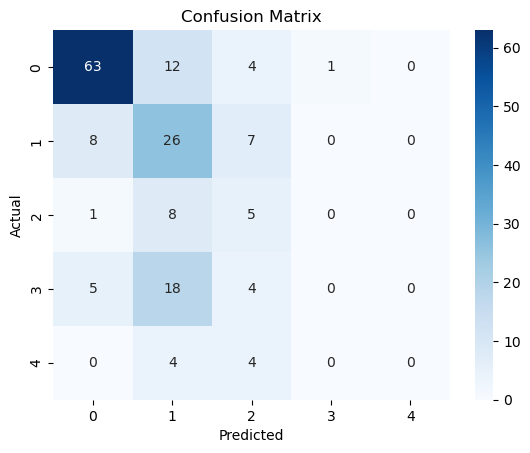

In [186]:
cm = confusion_matrix(y_test, y_pred_gcv_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [190]:
print("Best param", grid.best_params_)

Best param {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [191]:
print(classification_report(y_test,y_pred_gcv_test))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        80
         1.0       0.38      0.63      0.48        41
         2.0       0.21      0.36      0.26        14
         3.0       0.00      0.00      0.00        27
         4.0       0.00      0.00      0.00         8

    accuracy                           0.55       170
   macro avg       0.28      0.36      0.31       170
weighted avg       0.49      0.55      0.51       170



C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


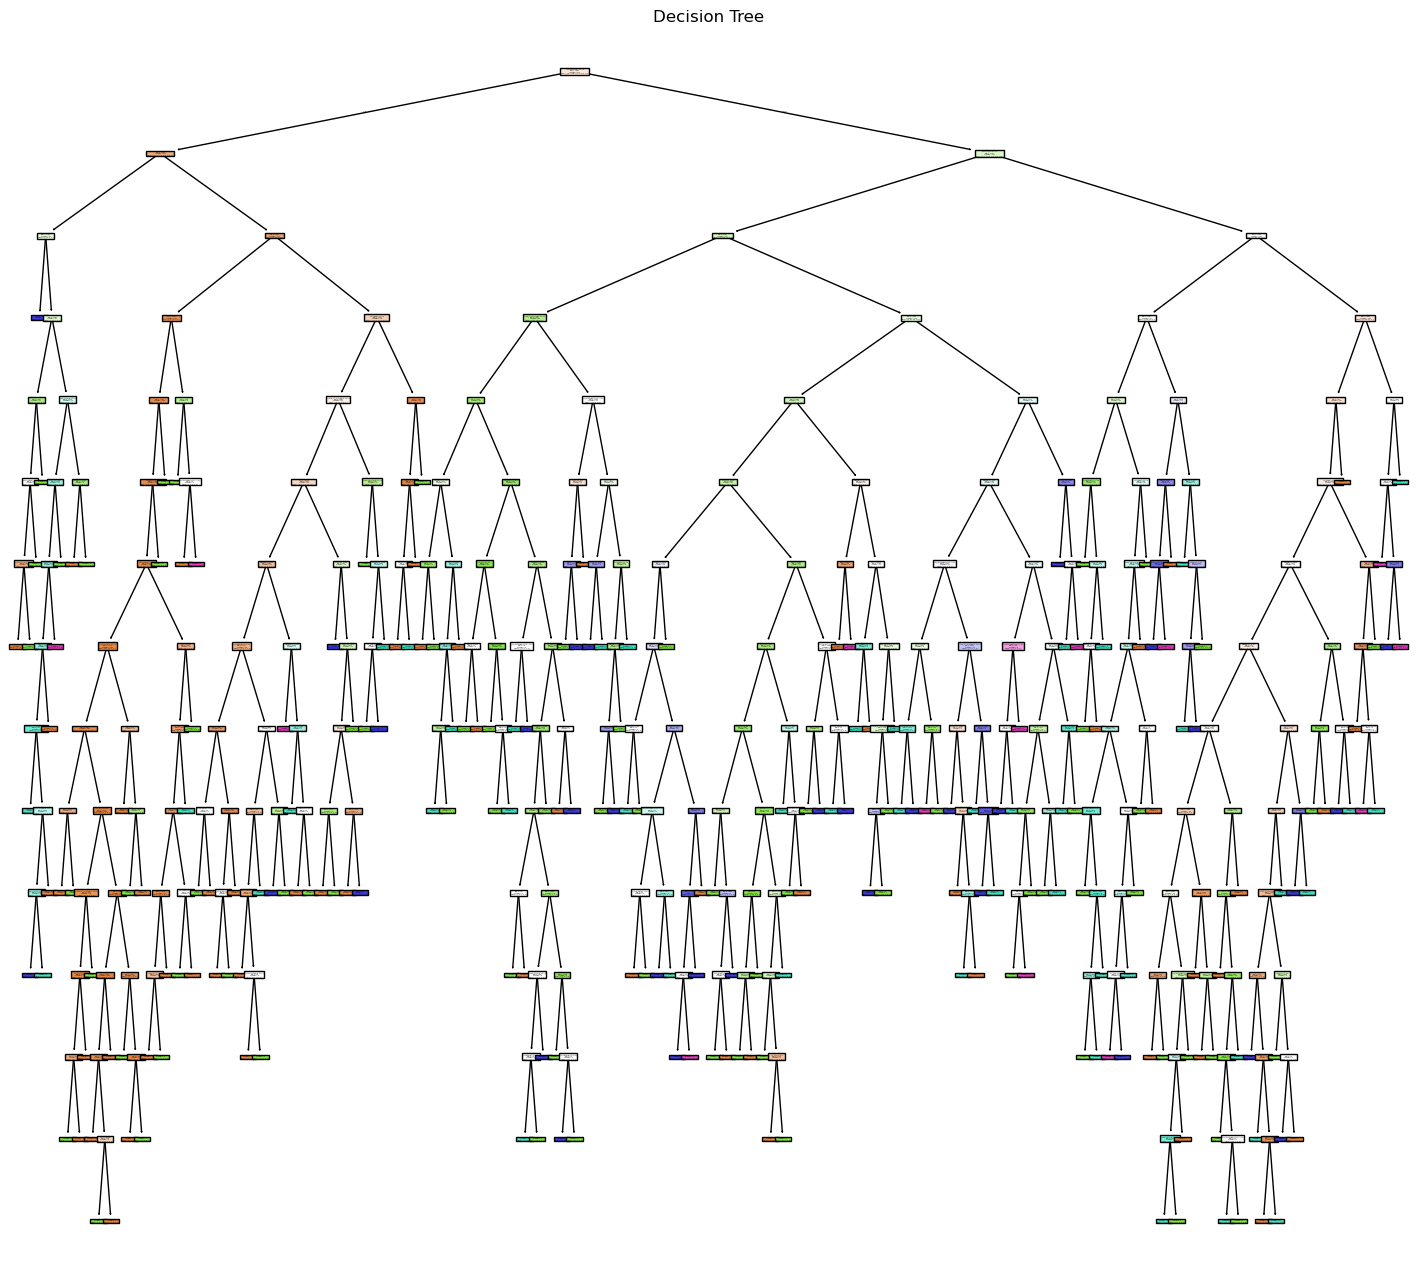

In [189]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18,16))
plot_tree(dt, feature_names = x.columns, filled=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
Precision and recall were high for class 0 but poor for other classes, indicating class imbalance.
This suggests the model struggles to generalize across all target classes.

# Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

-->max_depth: Limits the depth of the tree to prevent overfitting.
-->min_samples_split: Minimum number of samples required to split a node; higher values reduce overfitting.
-->criterion (gini or entropy) determines the function to measure the quality of a split.
-->min_samples_leaf: Sets the minimum number of samples at a leaf node; useful for smoothing the model.

2. What is the difference between the Label encoding and One-hot encoding?

-->Label Encoding assigns an integer value to each category. It introduces ordinal relationships which may mislead some models.
-->One-Hot Encoding creates binary columns for each category, avoiding any implicit order, making it ideal for nominal (non-ordinal) data.
-->One-hot is generally safer for ML models that assume numerical distance between values.